# Modelisation Notebook

In [1]:
# Librairies to import :

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# Charging preprocessed data :
data = pd.read_csv("preprocessed_data.csv")

In [3]:
data.head()

,categorical_data_pipeline__BuildingType_campus,categorical_data_pipeline__BuildingType_nonresidential,categorical_data_pipeline__BuildingType_nonresidential cos,categorical_data_pipeline__BuildingType_nonresidential wa,categorical_data_pipeline__BuildingType_sps-district k-12,categorical_data_pipeline__PrimaryPropertyType_college/university,categorical_data_pipeline__PrimaryPropertyType_distribution center,categorical_data_pipeline__PrimaryPropertyType_hospital,categorical_data_pipeline__PrimaryPropertyType_hotel,categorical_data_pipeline__PrimaryPropertyType_k-12 school,...,new_numerical_data_pipeline__PropertyGFATotal,new_numerical_data_pipeline__PropertyGFAParking,new_numerical_data_pipeline__PropertyGFABuilding(s),new_numerical_data_pipeline__thermal_resistance_approach_1,new_numerical_data_pipeline__thermal_resistance_approach_2,new_numerical_data_pipeline__distance,binary_data_pipeline__UseNaturalGas,binary_data_pipeline__UseElectricity,targets_pipeline__SiteEnergyUse,targets_pipeline__TotalGHGEmissions
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.008288,0.000004,0.014832,0.021685,0.061756,0.556664,1.0,1.0,6981428.0,249.43
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.009913,0.029391,0.014839,0.022290,0.061786,0.536666,1.0,1.0,8354235.0,263.51
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.102129,0.000004,0.108054,0.036095,0.449908,0.557378,1.0,1.0,73130656.0,2061.48
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.011667,0.024311,0.016859,0.020431,0.070196,0.573167,1.0,1.0,14829099.0,507.70
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.009239,0.072570,0.011807,0.041989,0.049161,0.558627,1.0,1.0,12051984.0,304.62


In [4]:
data.shape

(3167, 209)

### Splitting out target features and input features with a StratifiedSuffleSplit :

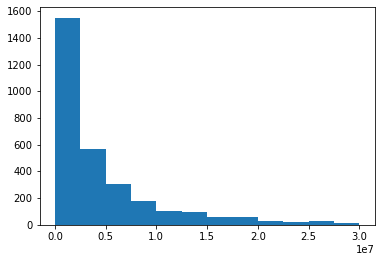

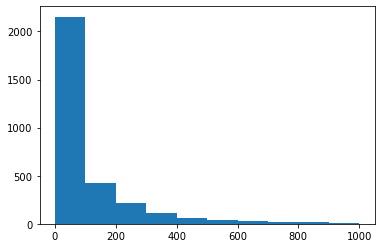

In [5]:
# 'SiteEnergyUse' :
y1_train = data['targets_pipeline__SiteEnergyUse'].values

# 'TotalGHGEmissions'
y2_train = data['targets_pipeline__TotalGHGEmissions'].values

# Distribution of 'SiteEnergyUse' :
plt.hist(y1_train, bins = 12, range=(0, 3E7))
plt.show()

# Distribution of 'TotalGHGEmissions' :
plt.hist(y2_train, bins = 10, range=(0, 1000))
plt.show()

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

# Creation of the qualitative features from target features :

data['categ_SiteEnergyUse'] = pd.cut(data['targets_pipeline__SiteEnergyUse'], 
                                     bins=[-1, 2.5E6, 5E6, 7.5E6, 1E7, 1.25E7, 1.5E7, 1.75E7, 
                                           2E7, 2.25E7, 2.5E7, 2.75E7, 3E7, np.inf],
                                     labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])

data['categ_TotalGHGEmissions'] = pd.cut(data['targets_pipeline__TotalGHGEmissions'],
                                         bins = [-1, 100, 200, 300, 400, 500, 600, 700, 800, 900, np.inf],
                                         labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

## StratifiedShuffleSplit :

# for 'SiteEnergyUse' :

dataset_split_1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=18)
for train_index_1, test_index_1 in dataset_split_1.split(data, data['categ_SiteEnergyUse']):
    train_set_1 = data.loc[train_index_1]
    test_set_1 = data.loc[test_index_1]
 
# for 'TotalGHGEmissions' :

dataset_split_2 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=18)
for train_index_2, test_index_2 in dataset_split_2.split(data, data['categ_TotalGHGEmissions']):
    train_set_2 = data.loc[train_index_2]
    test_set_2 = data.loc[test_index_2]
    

## Splitting of target features and input features :

X1_train = train_set_1.drop(columns=['targets_pipeline__SiteEnergyUse',
                                   'targets_pipeline__TotalGHGEmissions',
                                   'categ_SiteEnergyUse',
                                   'categ_TotalGHGEmissions'])

X1_test = test_set_1.drop(columns=['targets_pipeline__SiteEnergyUse',
                                   'targets_pipeline__TotalGHGEmissions',
                                   'categ_SiteEnergyUse',
                                   'categ_TotalGHGEmissions'])

X2_train = train_set_2.drop(columns=['targets_pipeline__SiteEnergyUse',
                                   'targets_pipeline__TotalGHGEmissions',
                                   'categ_SiteEnergyUse',
                                   'categ_TotalGHGEmissions'])

X2_test = test_set_2.drop(columns=['targets_pipeline__SiteEnergyUse',
                                   'targets_pipeline__TotalGHGEmissions',
                                   'categ_SiteEnergyUse',
                                   'categ_TotalGHGEmissions'])

y1_train = train_set_1['targets_pipeline__SiteEnergyUse']

y1_test = test_set_1['targets_pipeline__SiteEnergyUse']

y2_train = train_set_2['targets_pipeline__TotalGHGEmissions']

y2_test = test_set_2['targets_pipeline__TotalGHGEmissions']

<AxesSubplot:>

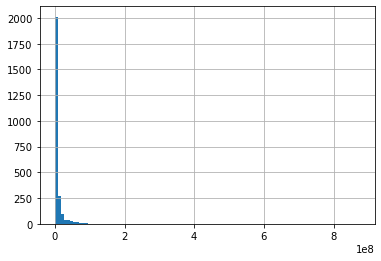

In [7]:
y1_train.hist(bins=100)

# Model construction for 'SiteEnergyUse' :
## Model selection for 'SiteEnergyUse'
### 1. Non-ensemble models

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [9]:
# Common parameters :
num_folds=10
seed = 18
score_1 = 'neg_root_mean_squared_error'
score_2 = 'neg_mean_absolute_error'
score_3 = 'r2'

# Setting of the models to test and their hyperparameters to tune :
models = []

models.append(('Lasso', Lasso()))
models.append(('Ridge', Ridge()))
models.append(('ElasticNet', ElasticNet()))
models.append(('SVM_rbf', SVR(kernel='rbf')))
models.append(('SVM_linear', SVR(kernel='linear')))

# Testing the models :

raws=[]

for name, model in models:
    results_rmse = []
    results_mae = []
    results_r2 = []
    print(name)
    print('')
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results_1 = cross_val_score(model, X1_train, y1_train, cv=kfold, scoring=score_1, n_jobs=-1)
    for a in cv_results_1:
        a = np.format_float_scientific(-a, precision=3)
        results_rmse.append(a)
    cv_results_2 = cross_val_score(model, X1_train, y1_train, cv=kfold, scoring=score_2, n_jobs=-1)
    for b in cv_results_2:
        b = np.format_float_scientific(-b, precision=3)
        results_mae.append(b)
    cv_results_3 = cross_val_score(model, X1_train, y1_train, cv=kfold, scoring=score_3, n_jobs=-1)
    for c in cv_results_3:
        results_r2.append(np.round(c,3))


    # Display corresponding performances :
    print("RMSE on cross validation sets :")
    print(results_rmse)
    print("Average RMSE : ", np.format_float_scientific(-cv_results_1.mean(), precision=3))
    print("Standard deviation of RMSE : ", np.format_float_scientific(cv_results_1.std(), precision=3))
    print("[RMSE std] / [Average RMSE] : ", 100*np.round(-cv_results_1.std()/cv_results_1.mean(),3),'%')
    print('')
    print("MAE on cross validation sets :")
    print(results_mae)
    print("Average MAE : ", np.format_float_scientific(-cv_results_2.mean(), precision=3))
    print("Standard deviation of MAE : ", np.format_float_scientific(cv_results_2.std(), precision=3))
    print("[MAE std] / [Average MAE] : ", 100*np.round(-cv_results_2.std()/cv_results_2.mean(),3),'%')
    print('')
    print("R² on cross validation sets :")
    print(results_r2)
    print("Average R² : ", np.round(cv_results_3.mean(),3))
    print("Standard deviation of R² : ", np.round(cv_results_3.std(),3))
    print("[R² std] / [Average R²] : ", 100*np.round(cv_results_3.std()/cv_results_3.mean(),3),'%')
    print('')
    print('- '*30)
    
    raws.append([name, 
                np.format_float_scientific(-cv_results_1.mean(), precision=3), 
                str(str(100*np.round(-cv_results_1.std()/cv_results_1.mean(),3))+'%'),
                np.format_float_scientific(cv_results_1.std(), precision=3),
                np.format_float_scientific(-cv_results_2.mean(), precision=3),
                str(str(100*np.round(-cv_results_2.std()/cv_results_2.mean(),3))+'%'),
                np.format_float_scientific(cv_results_2.std()),
                np.round(cv_results_3.mean(),3),
                str(str(100*np.round(cv_results_3.std()/cv_results_3.mean(),3))+'%'),
                np.round(cv_results_3.std(),3)])

    
# Display corresponding performances in an array :
column_names = ['Model', 
                'Average RMSE', 
                '[RMSE std] / [RMSE average]', 
                'Standard deviation of RMSE',
                'Average MAE',
                '[MAE std] / [MAE average]',
                'Standard deviation of MAE',
                'Average R²',
                '[R² std] / [Average R²]',
                'Standard Deviation of R²']

pd.DataFrame(raws, columns=column_names)
    


Lasso

RMSE on cross validation sets :
['7.816e+06', '1.072e+07', '1.035e+07', '2.488e+07', '9.027e+06', '2.36e+07', '1.175e+07', '6.562e+06', '1.826e+07', '1.029e+07']
Average RMSE :  1.333e+07
Standard deviation of RMSE :  6.208e+06
[RMSE std] / [Average RMSE] :  46.6 %

MAE on cross validation sets :
['4.226e+06', '5.2e+06', '4.811e+06', '6.013e+06', '4.788e+06', '5.404e+06', '5.075e+06', '3.664e+06', '5.481e+06', '5.088e+06']
Average MAE :  4.975e+06
Standard deviation of MAE :  6.271e+05
[MAE std] / [Average MAE] :  12.6 %

R² on cross validation sets :
[0.633, 0.552, 0.785, 0.798, 0.536, 0.382, 0.814, 0.676, 0.35, 0.541]
Average R² :  0.607
Standard deviation of R² :  0.157
[R² std] / [Average R²] :  25.8 %

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Ridge

RMSE on cross validation sets :
['7.608e+06', '9.435e+06', '1.2e+07', '4.698e+07', '8.222e+06', '2.474e+07', '1.238e+07', '8.041e+06', '1.765e+07', '1.136e+07']
Average RMSE :  1.584e+07
Standard deviation of

,Model,Average RMSE,[RMSE std] / [RMSE average],Standard deviation of RMSE,Average MAE,[MAE std] / [MAE average],Standard deviation of MAE,Average R²,[R² std] / [Average R²],Standard Deviation of R²
0,Lasso,1.333e+07,46.6%,6.208e+06,4.975e+06,12.6%,6.27147474163017e+05,0.607,25.8%,0.157
1,Ridge,1.584e+07,72.7%,1.152e+07,5.000e+06,16.3%,8.141156454406264e+05,0.537,30.7%,0.165
2,ElasticNet,2.173e+07,58.8%,1.277e+07,7.65e+06,12.1%,9.272154416491776e+05,0.103,54.900000000000006%,0.057
3,SVM_rbf,2.338e+07,53.0%,1.239e+07,6.835e+06,16.5%,1.1262072866910065e+06,-0.082,-44.5%,0.036
4,SVM_linear,2.332e+07,53.2%,1.242e+07,6.763e+06,16.6%,1.1231525715527001e+06,-0.075,-44.4%,0.033


On all of these models, the Lasso model has the best performances and MAE seems to be the most adequate scoring method to optimize it as it is more stable on folds than RMSE or R².

We are going to keep the Lasso model to tune further.

### 2. Ensemble models

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [11]:
# Common parameters :
num_folds=10
seed = 18
score_1 = 'neg_root_mean_squared_error'
score_2 = 'neg_mean_absolute_error'
score_3 = 'r2'

# Setting of the models to test and their hyperparameters to tune :
models = []

models.append(('DecisionTreeRegressor', DecisionTreeRegressor()))
models.append(('RandomForestRegressor', RandomForestRegressor()))
models.append(('AdaBoostRegressor', AdaBoostRegressor()))
models.append(('BaggingRegressor', BaggingRegressor()))
models.append(('GradientBoostingRegressor', GradientBoostingRegressor()))

# Testing the models :

raws=[]

for name, model in models:
    results_rmse = []
    results_mae = []
    results_r2 = []
    print(name)
    print('')
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results_1 = cross_val_score(model, X1_train, y1_train, cv=kfold, scoring=score_1, n_jobs=-1)
    for a in cv_results_1:
        a = np.format_float_scientific(-a, precision=3)
        results_rmse.append(a)
    cv_results_2 = cross_val_score(model, X1_train, y1_train, cv=kfold, scoring=score_2, n_jobs=-1)
    for b in cv_results_2:
        b = np.format_float_scientific(-b, precision=3)
        results_mae.append(b)
    cv_results_3 = cross_val_score(model, X1_train, y1_train, cv=kfold, scoring=score_3, n_jobs=-1)
    for c in cv_results_3:
        results_r2.append(np.round(c,3))


    # Display corresponding performances :
    print("RMSE on cross validation sets :")
    print(results_rmse)
    print("Average RMSE : ", np.format_float_scientific(-cv_results_1.mean(), precision=3))
    print("Standard deviation of RMSE : ", np.format_float_scientific(cv_results_1.std(), precision=3))
    print("[RMSE std] / [Average RMSE] : ", 100*np.round(-cv_results_1.std()/cv_results_1.mean(),3),'%')
    print('')
    print("MAE on cross validation sets :")
    print(results_mae)
    print("Average MAE : ", np.format_float_scientific(-cv_results_2.mean(), precision=3))
    print("Standard deviation of MAE : ", np.format_float_scientific(cv_results_2.std(), precision=3))
    print("[MAE std] / [Average MAE] : ", 100*np.round(-cv_results_2.std()/cv_results_2.mean(),3),'%')
    print('')
    print("R² on cross validation sets :")
    print(results_r2)
    print("Average R² : ", np.round(cv_results_3.mean(),3))
    print("Standard deviation of R² : ", np.round(cv_results_3.std(),3))
    print("[R² std] / [Average R²] : ", 100*np.round(cv_results_3.std()/cv_results_3.mean(),3),'%')
    print('')
    print('- '*30)
    
    raws.append([name, 
                np.format_float_scientific(-cv_results_1.mean(), precision=3), 
                str(str(100*np.round(-cv_results_1.std()/cv_results_1.mean(),3))+'%'),
                np.format_float_scientific(cv_results_1.std(), precision=3),
                np.format_float_scientific(-cv_results_2.mean(), precision=3),
                str(str(100*np.round(-cv_results_2.std()/cv_results_2.mean(),3))+'%'),
                np.format_float_scientific(cv_results_2.std()),
                np.round(cv_results_3.mean(),3),
                str(str(100*np.round(cv_results_3.std()/cv_results_3.mean(),3))+'%'),
                np.round(cv_results_3.std(),3)])

    
# Display corresponding performances in an array :
column_names = ['Model', 
                'Average RMSE', 
                '[RMSE std] / [RMSE average]', 
                'Standard deviation of RMSE',
                'Average MAE',
                '[MAE std] / [MAE average]',
                'Standard deviation of MAE',
                'Average R²',
                '[R² std] / [Average R²]',
                'Standard Deviation of R²']

pd.DataFrame(raws, columns=column_names)
    


DecisionTreeRegressor

RMSE on cross validation sets :
['4.96e+06', '7.724e+06', '2.273e+07', '5.288e+07', '4.486e+06', '2.655e+07', '5.327e+06', '5.395e+06', '1.71e+07', '9.161e+06']
Average RMSE :  1.563e+07
Standard deviation of RMSE :  1.454e+07
[RMSE std] / [Average RMSE] :  93.0 %

MAE on cross validation sets :
['2.149e+06', '2.759e+06', '3.445e+06', '5.788e+06', '2.13e+06', '3.938e+06', '1.971e+06', '1.748e+06', '3.225e+06', '2.672e+06']
Average MAE :  2.982e+06
Standard deviation of MAE :  1.148e+06
[MAE std] / [Average MAE] :  38.5 %

R² on cross validation sets :
[0.841, 0.82, -0.156, 0.095, 0.868, 0.255, 0.96, 0.77, 0.387, 0.628]
Average R² :  0.547
Standard deviation of R² :  0.361
[R² std] / [Average R²] :  65.9 %

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
RandomForestRegressor

RMSE on cross validation sets :
['4.566e+06', '1.125e+07', '1.064e+07', '4.951e+07', '4.769e+06', '2.52e+07', '7.011e+06', '4.189e+06', '1.678e+07', '8.433e+06']
Average RMSE : 

,Model,Average RMSE,[RMSE std] / [RMSE average],Standard deviation of RMSE,Average MAE,[MAE std] / [MAE average],Standard deviation of MAE,Average R²,[R² std] / [Average R²],Standard Deviation of R²
0,DecisionTreeRegressor,1.563e+07,93.0%,1.454e+07,2.982e+06,38.5%,1.147683243575143e+06,0.547,65.9%,0.361
1,RandomForestRegressor,1.423e+07,93.30000000000001%,1.328e+07,2.918e+06,30.2%,8.804812116250739e+05,0.654,36.3%,0.238
2,AdaBoostRegressor,2.483e+07,43.8%,1.088e+07,1.740e+07,26.1%,4.5416437881012065e+06,-0.548,-160.9%,0.882
3,BaggingRegressor,1.412e+07,93.4%,1.319e+07,3.021e+06,32.2%,9.734843532660975e+05,0.593,44.3%,0.263
4,GradientBoostingRegressor,1.476e+07,90.7%,1.338e+07,3.607e+06,25.8%,9.321860442605843e+05,0.642,35.9%,0.231


On the 3 metrics shown here, we can see that RMSE is clearly less stable than both R² and MAE : the most stable results are shown for MAE.

For tuning, we are going to keep a parallel ensemble model; the RandomForestRegressor; and a sequential ensemble model; the GradientBoostingRegressor.

## Model tuning :

**Lasso :**

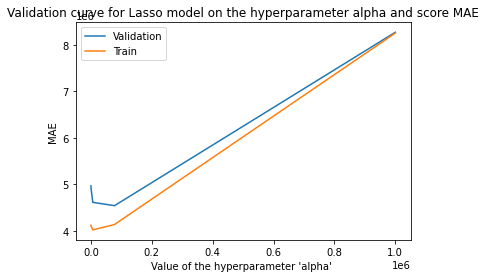

In [12]:
from sklearn.model_selection import validation_curve

model_LA = Lasso()

alphas = np.logspace(-4, 6, 10)

score = 'neg_mean_absolute_error'

alpha_train_score, alpha_val_score = validation_curve(estimator=model_LA, 
                                                      X=X1_train, 
                                                      y=y1_train,
                                                      param_name="alpha",
                                                      param_range=alphas,
                                                      cv=10,
                                                      scoring=score,
                                                      n_jobs=-1)

plt.plot(alphas, -alpha_val_score.mean(axis=1), label='Validation')
plt.plot(alphas, -alpha_train_score.mean(axis=1), label='Train')

plt.ylabel('MAE')
plt.xlabel("Value of the hyperparameter 'alpha' ")
plt.legend()
plt.title("Validation curve for Lasso model on the hyperparameter alpha and score MAE")
plt.show()

In [13]:
from sklearn import model_selection

## Common parameters :
num_folds=10
seed = 18
score = 'neg_mean_absolute_error'
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)


## Creation of model and hyperparameters based on the validation curve :
model_LA = Lasso()
hyperparameters = [{"alpha": np.logspace(0, 5, 20)}]

tested_model = model_selection.GridSearchCV(model_LA,
                                            param_grid=hyperparameters,
                                            cv=kfold,
                                            scoring=score,
                                            n_jobs=-1)

# Fitting it on train set :
tested_model.fit(X1_train, y1_train)

# Display corresponding performances :
print("Results of cross validation :")
for mean, std, params in zip(tested_model.cv_results_['mean_test_score'], # score moyen
                             tested_model.cv_results_['std_test_score'],  # écart-type du score
                             tested_model.cv_results_['params']):           # valeur de l'hyperparamètre
                                
    print("Performances for hyperparameters values ", params, " :")
    print("Mean MAE : ", np.format_float_scientific(-mean, precision=15))
    print("Standard Deviation : ", np.format_float_scientific(std))
    print("[std of score] / [average score] : ", abs(100*np.round(std/mean, 3)), "%")
    print('')
    print('- '*30)


# Display best hyperparameters :
print('- '*30)
print("Best hyperparameters on train set for Lasso :")
print(tested_model.best_params_)
print("Performance for best hyperpârameters : ")
print(np.format_float_scientific(tested_model.best_score_))

# Saving the best model for further comparison :
best_Lasso = tested_model.best_estimator_

Results of cross validation :
Performances for hyperparameters values  {'alpha': 1.0}  :
Mean MAE :  4.974787166781421e+06
Standard Deviation :  6.27147474163017e+05
[std of score] / [average score] :  12.6 %

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Performances for hyperparameters values  {'alpha': 1.8329807108324359}  :
Mean MAE :  4.974587231205418e+06
Standard Deviation :  6.271187387043936e+05
[std of score] / [average score] :  12.6 %

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Performances for hyperparameters values  {'alpha': 3.3598182862837818}  :
Mean MAE :  4.974233908984136e+06
Standard Deviation :  6.270881024235219e+05
[std of score] / [average score] :  12.6 %

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Performances for hyperparameters values  {'alpha': 6.158482110660264}  :
Mean MAE :  4.973565662768227e+06
Standard Deviation :  6.270111665359836e+05
[std of score] / [average score] :  12.6 %

- - - - - - - - - - 

**RandomForestRegressor :**

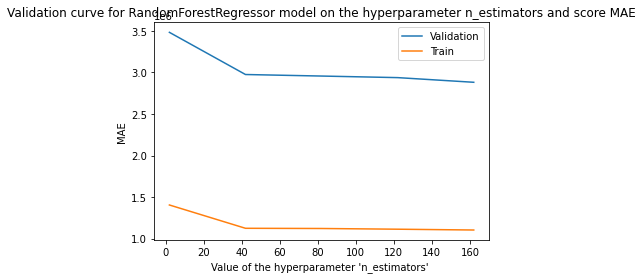

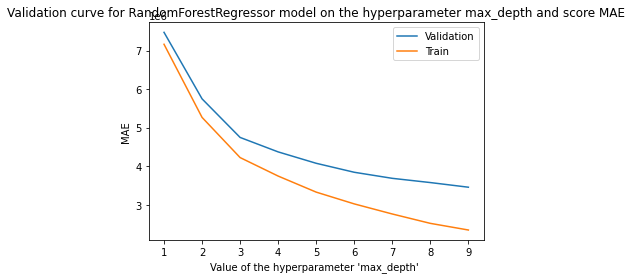

In [14]:
from sklearn.model_selection import validation_curve

model_RF = RandomForestRegressor()
score = 'neg_mean_absolute_error'

# n_estimators

n_estimators_range = np.arange(2, 200, 40)

n_estimators_train_score, n_estimators_val_score = validation_curve(estimator=model_RF, 
                                                                    X=X1_train, 
                                                                    y=y1_train,
                                                                    param_name="n_estimators",
                                                                    param_range=n_estimators_range,
                                                                    cv=5,
                                                                    scoring=score,
                                                                    n_jobs=-1)

plt.plot(n_estimators_range, -n_estimators_val_score.mean(axis=1), label='Validation')
plt.plot(n_estimators_range, -n_estimators_train_score.mean(axis=1), label='Train')

plt.ylabel('MAE')
plt.xlabel("Value of the hyperparameter 'n_estimators' ")
plt.legend()
plt.title("Validation curve for RandomForestRegressor model on the hyperparameter n_estimators and score MAE")
plt.show()

# max_depth

max_depths = np.arange(1, 10, 1)

max_depth_train_score, max_depth_val_score = validation_curve(estimator=model_RF, 
                                                              X=X1_train, 
                                                              y=y1_train,
                                                              param_name="max_depth",
                                                              param_range=max_depths,
                                                              cv=5,
                                                              scoring=score,
                                                              n_jobs=-1)

plt.plot(max_depths, -max_depth_val_score.mean(axis=1), label='Validation')
plt.plot(max_depths, -max_depth_train_score.mean(axis=1), label='Train')

plt.ylabel('MAE')
plt.xlabel("Value of the hyperparameter 'max_depth' ")
plt.legend()
plt.title("Validation curve for RandomForestRegressor model on the hyperparameter max_depth and score MAE")
plt.show()


In [15]:
## Common parameters :
num_folds=5
seed = 18
score = 'neg_mean_absolute_error'
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)


## Creation of model and hyperparameters based on the validation curve :
model_RF = RandomForestRegressor()
hyperparameters = [{"n_estimators": np.arange(50, 80, 15), "max_depth": np.arange(2, 6, 1)},
                   {"bootstrap": [False], "n_estimators": np.arange(50, 80, 15), "max_depth": np.arange(2, 6, 1)},
                   {"criterion": ['absolute_error'], "n_estimators": np.arange(50, 80, 15), "max_depth": np.arange(2, 6, 1)}]

tested_model = model_selection.GridSearchCV(model_RF,
                                            param_grid=hyperparameters,
                                            cv=kfold,
                                            scoring=score,
                                            n_jobs=-1)

# Fitting it on train set :
tested_model.fit(X1_train, y1_train)

# Display corresponding performances :
print("Results of cross validation :")
for mean, std, params in zip(tested_model.cv_results_['mean_test_score'], # score moyen
                             tested_model.cv_results_['std_test_score'],  # écart-type du score
                             tested_model.cv_results_['params']):           # valeur de l'hyperparamètre
                                
    print("Performances for hyperparameters values ", params, " :")
    print("Mean MAE : ", np.format_float_scientific(-mean, precision=15))
    print("Standard Deviation : ", np.format_float_scientific(std))
    print("[std of score] / [average score] : ", abs(100*np.round(std/mean, 3)), "%")
    print('')
    print('- '*30)


# Display best hyperparameters :
print('- '*30)
print("Best hyperparameters on train set for RandomForestRegressor :")
print(tested_model.best_params_)
print("Performance for best hyperpârameters : ")
print(np.format_float_scientific(tested_model.best_score_))

# Saving the best model for further comparison :
best_RandomForest = tested_model.best_estimator_

Results of cross validation :
Performances for hyperparameters values  {'max_depth': 2, 'n_estimators': 50}  :
Mean MAE :  5.892344716849544e+06
Standard Deviation :  5.359340814938e+05
[std of score] / [average score] :  9.1 %

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Performances for hyperparameters values  {'max_depth': 2, 'n_estimators': 65}  :
Mean MAE :  5.987410179284921e+06
Standard Deviation :  4.354777020203707e+05
[std of score] / [average score] :  7.3 %

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Performances for hyperparameters values  {'max_depth': 3, 'n_estimators': 50}  :
Mean MAE :  5.046307195895474e+06
Standard Deviation :  4.835667234678862e+05
[std of score] / [average score] :  9.6 %

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Performances for hyperparameters values  {'max_depth': 3, 'n_estimators': 65}  :
Mean MAE :  4.999497602976365e+06
Standard Deviation :  4.3753246610990906e+05
[std of score] / [averag

**GradientBoostingRegressor :**

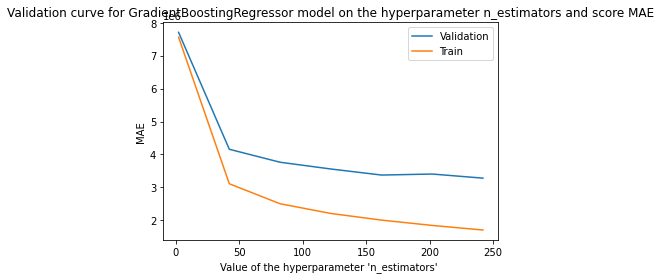

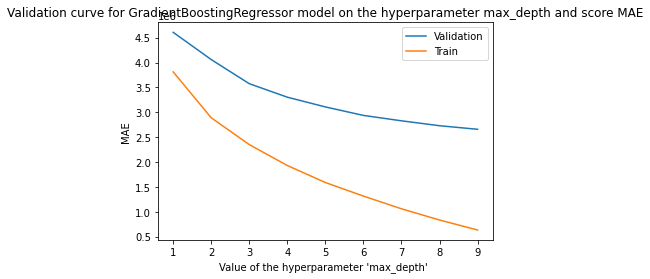

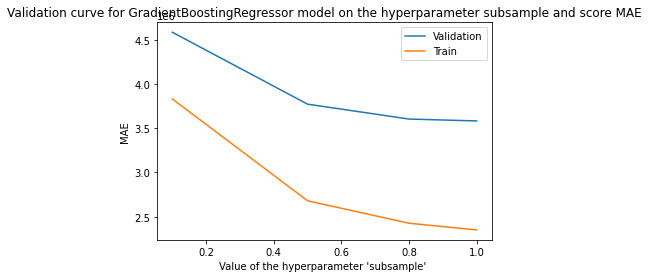

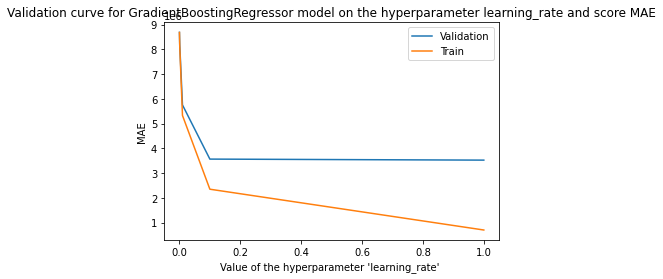

In [16]:
from sklearn.model_selection import validation_curve

model_GB = GradientBoostingRegressor()
score = 'neg_mean_absolute_error'

# n_estimators

n_estimators_range = np.arange(2, 250, 40)

n_estimators_train_score, n_estimators_val_score = validation_curve(estimator=model_GB, 
                                                                    X=X1_train, 
                                                                    y=y1_train,
                                                                    param_name="n_estimators",
                                                                    param_range=n_estimators_range,
                                                                    cv=5,
                                                                    scoring=score,
                                                                    n_jobs=-1)

plt.plot(n_estimators_range, -n_estimators_val_score.mean(axis=1), label='Validation')
plt.plot(n_estimators_range, -n_estimators_train_score.mean(axis=1), label='Train')

plt.ylabel('MAE')
plt.xlabel("Value of the hyperparameter 'n_estimators' ")
plt.legend()
plt.title("Validation curve for GradientBoostingRegressor model on the hyperparameter n_estimators and score MAE")
plt.show()

# max_depth

max_depths = np.arange(1, 10, 1)

max_depth_train_score, max_depth_val_score = validation_curve(estimator=model_GB, 
                                                              X=X1_train, 
                                                              y=y1_train,
                                                              param_name="max_depth",
                                                              param_range=max_depths,
                                                              cv=5,
                                                              scoring=score,
                                                              n_jobs=-1)

plt.plot(max_depths, -max_depth_val_score.mean(axis=1), label='Validation')
plt.plot(max_depths, -max_depth_train_score.mean(axis=1), label='Train')

plt.ylabel('MAE')
plt.xlabel("Value of the hyperparameter 'max_depth' ")
plt.legend()
plt.title("Validation curve for GradientBoostingRegressor model on the hyperparameter max_depth and score MAE")
plt.show()

# subsample

subsample_range = [0.1, 0.5, 0.8 , 1]

subsample_train_score, subsample_val_score = validation_curve(estimator=model_GB,
                                                              X=X1_train, 
                                                              y=y1_train,
                                                              param_name="subsample",
                                                              param_range=subsample_range,
                                                              cv=5,
                                                              scoring=score,
                                                              n_jobs=-1)

plt.plot(subsample_range, -subsample_val_score.mean(axis=1), label='Validation')
plt.plot(subsample_range, -subsample_train_score.mean(axis=1), label='Train')

plt.ylabel('MAE')
plt.xlabel("Value of the hyperparameter 'subsample' ")
plt.legend()
plt.title("Validation curve for GradientBoostingRegressor model on the hyperparameter subsample and score MAE")
plt.show()

# learning_rate

learning_range = np.logspace(-4, 0, 5)

learning_train_score, learning_val_score = validation_curve(estimator=model_GB, 
                                                            X=X1_train, 
                                                            y=y1_train,
                                                            param_name="learning_rate",
                                                            param_range=learning_range,
                                                            cv=5,
                                                            scoring=score,
                                                            n_jobs=-1)

plt.plot(learning_range, -learning_val_score.mean(axis=1), label='Validation')
plt.plot(learning_range, -learning_train_score.mean(axis=1), label='Train')

plt.ylabel('MAE')
plt.xlabel("Value of the hyperparameter 'learning_rate' ")
plt.legend()
plt.title("Validation curve for GradientBoostingRegressor model on the hyperparameter learning_rate and score MAE")
plt.show()

In [17]:
## Common parameters :
num_folds=5
seed = 18
score = 'neg_mean_absolute_error'
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)


## Creation of model and hyperparameters based on the validation curve :
model_GB = GradientBoostingRegressor()
hyperparameters = [{"n_estimators": [50, 80, 120, 160, 200], 
                    "max_depth": [3, 4, 5, 6], 
                    "subsample": [0.5, 0.6, 0.7, 0.8],
                    "learning_rate": [0.01, 0.05, 0.1, 0.015, 0.2]}]

tested_model = model_selection.GridSearchCV(model_GB,
                                            param_grid=hyperparameters,
                                            cv=kfold,
                                            scoring=score,
                                            n_jobs=-1)

# Fitting it on train set :
tested_model.fit(X1_train, y1_train)

# Display corresponding performances :
print("Results of cross validation :")
for mean, std, params in zip(tested_model.cv_results_['mean_test_score'], # score moyen
                             tested_model.cv_results_['std_test_score'],  # écart-type du score
                             tested_model.cv_results_['params']):           # valeur de l'hyperparamètre
                                
    print("Performances for hyperparameters values ", params, " :")
    print("Mean MAE : ", np.format_float_scientific(-mean, precision=15))
    print("Standard Deviation : ", np.format_float_scientific(std))
    print("[std of score] / [average score] : ", abs(100*np.round(std/mean, 3)), "%")
    print('')
    print('- '*30)


# Display best hyperparameters :
print('- '*30)
print("Best hyperparameters on train set for GradientBoostingRegressor :")
print(tested_model.best_params_)
print("Performance for best hyperpârameters : ")
print(np.format_float_scientific(tested_model.best_score_))

# Saving the best model for further comparison :
best_GradientBoosting = tested_model.best_estimator_

Results of cross validation :
Performances for hyperparameters values  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.5}  :
Mean MAE :  6.620008828690497e+06
Standard Deviation :  5.452709810239003e+05
[std of score] / [average score] :  8.200000000000001 %

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Performances for hyperparameters values  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.6}  :
Mean MAE :  6.62805968865593e+06
Standard Deviation :  5.681702800402426e+05
[std of score] / [average score] :  8.6 %

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Performances for hyperparameters values  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}  :
Mean MAE :  6.650766438444291e+06
Standard Deviation :  5.804579788017845e+05
[std of score] / [average score] :  8.7 %

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Performances for hyperparameters values  {'le

Performances for hyperparameters values  {'learning_rate': 0.015, 'max_depth': 4, 'n_estimators': 80, 'subsample': 0.5}  :
Mean MAE :  5.154523400541546e+06
Standard Deviation :  5.543903283732038e+05
[std of score] / [average score] :  10.8 %

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Performances for hyperparameters values  {'learning_rate': 0.015, 'max_depth': 4, 'n_estimators': 80, 'subsample': 0.6}  :
Mean MAE :  5.074711511553886e+06
Standard Deviation :  5.1448146493306576e+05
[std of score] / [average score] :  10.100000000000001 %

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Performances for hyperparameters values  {'learning_rate': 0.015, 'max_depth': 4, 'n_estimators': 80, 'subsample': 0.7}  :
Mean MAE :  5.145118224597981e+06
Standard Deviation :  5.580240997842449e+05
[std of score] / [average score] :  10.8 %

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Performances for hyperparameters values  {'learning_rate': 0.015, '

## Comparison of best models performances and baseline :

In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = [("Baseline Lasso", Lasso()),
          ("Lasso", best_Lasso), 
          ("RandomForest", best_RandomForest), 
          ("GradientBoosting", best_GradientBoosting)]


raws_generalization = []
raws_all_metrics = []

cv_results_MAE = []
cv_results_RMSE = []
cv_results_R2 = []

for name, model in models:
    # Train set :
    model.fit(X1_train, y1_train)
    y1_pred_train = model.predict(X1_train)
    MAE_train = np.format_float_scientific(mean_absolute_error(y1_train, y1_pred_train), precision=3)
    RMSE_train = np.format_float_scientific(np.sqrt(mean_squared_error(y1_train, y1_pred_train)), precision=3)
    R2_train = np.round(r2_score(y1_train, y1_pred_train),3)
    
    # CV sets :
    results_rmse = []
    results_mae = []
    results_r2 = []
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    
    cv_results_1 = cross_val_score(model, X1_train, y1_train, cv=kfold, scoring='neg_mean_absolute_error', n_jobs=-1)
    cv_results_MAE.append([name, cv_results_1])
    
    cv_results_2 = cross_val_score(model, X1_train, y1_train, cv=kfold, scoring='neg_root_mean_squared_error', n_jobs=-1)
    cv_results_RMSE.append([name, cv_results_2])
    
    cv_results_3 = cross_val_score(model, X1_train, y1_train, cv=kfold, scoring='r2', n_jobs=-1)
    cv_results_R2.append([name, cv_results_3])
        
    cv_mae_avg = np.format_float_scientific(-cv_results_1.mean(), precision=3)
    cv_mae_std = np.format_float_scientific(cv_results_1.std(), precision=3)
    cv_mae_ratio = str(str(100*np.round(-cv_results_1.std()/cv_results_1.mean(),3))+'%')
    
    cv_rmse_avg = np.format_float_scientific(-cv_results_2.mean(), precision=3)
    cv_rmse_std = np.format_float_scientific(cv_results_2.std(), precision=3)
    cv_rmse_ratio = str(str(100*np.round(-cv_results_2.std()/cv_results_2.mean(),3))+'%')
    
    cv_r2_avg = np.round(cv_results_3.mean(),3)
    cv_r2_std = np.round(cv_results_3.std(),3)
    cv_r2_ratio = str(str(100*np.round(cv_results_3.std()/cv_results_3.mean(),3))+'%')
    
    # Test set :
    model.fit(X1_train, y1_train)
    y1_pred_test = model.predict(X1_test)
    MAE_test = float(np.format_float_scientific(mean_absolute_error(y1_test, y1_pred_test), precision=3))
    RMSE_test = float(np.format_float_scientific(np.sqrt(mean_squared_error(y1_test, y1_pred_test)), precision=3))
    R2_test = float(np.round(r2_score(y1_test, y1_pred_test),3))
    
    raws_all_metrics.append([name, 
                             MAE_train, RMSE_train, R2_train, 
                             cv_mae_avg, cv_mae_std, cv_mae_ratio, 
                             cv_rmse_avg, cv_rmse_std, cv_rmse_ratio,
                             cv_r2_avg, cv_r2_std, cv_r2_ratio,
                             MAE_test, RMSE_test, R2_test])
    raws_generalization.append([name, 
                                MAE_train, cv_mae_avg, MAE_test,
                                RMSE_train, cv_rmse_avg, RMSE_test,
                                R2_train, cv_r2_avg, R2_test])
    
all_metrics = pd.DataFrame(raws_all_metrics, columns=["Model", 
                                                      "MAE train set", "RMSE train set", "R2 train set", 
                                                      "MAE cv set", "std MAE cv set", "std/avg MAE cv", 
                                                      "RMSE cv set", "std RMSE cv set", "std/avg RMSE cv",
                                                      "R2 cv set", "std R2 cv set", "std/avg R2 cv",
                                                      "MAE test set", "RMSE test set", "R2 test set"])

generalization = pd.DataFrame(raws_generalization, columns=["Model",
                                                            "MAE train set", "MAE cv set", "MAE test set",
                                                            "RMSE train set", "RMSE cv set", "RMSE test set",
                                                            "R2 train set", "R2 cv set", "R2 test set"])
    

C:\Users\may81\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.285e+16, tolerance: 1.695e+14
  model = cd_fast.enet_coordinate_descent(
C:\Users\may81\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.285e+16, tolerance: 1.695e+14
  model = cd_fast.enet_coordinate_descent(


In [70]:
all_metrics

,Model,MAE train set,RMSE train set,R2 train set,MAE cv set,std MAE cv set,std/avg MAE cv,RMSE cv set,std RMSE cv set,std/avg RMSE cv,R2 cv set,std R2 cv set,std/avg R2 cv,MAE test set,RMSE test set,R2 test set
0,Baseline Lasso,4.192e+06,9.183e+06,0.874,4.975e+06,6.271e+05,12.6%,1.333e+07,6.208e+06,46.6%,0.607,0.157,25.8%,5462000.0,14500000.0,0.670
1,Lasso,4.013e+06,9.687e+06,0.860,4.536e+06,6.915e+05,15.2%,1.39e+07,7.889e+06,56.8%,0.605,0.166,27.500000000000004%,4927000.0,13650000.0,0.708
2,RandomForest,2.999e+06,9.632e+06,0.861,3.801e+06,9.937e+05,26.1%,1.539e+07,1.294e+07,84.1%,0.592,0.226,38.1%,3580000.0,11530000.0,0.791
3,GradientBoosting,4.74e+05,6.462e+05,0.999,2.499e+06,9.51e+05,38.1%,1.39e+07,1.387e+07,99.8%,0.692,0.238,34.4%,2056000.0,9064000.0,0.871


In [71]:
generalization

,Model,MAE train set,MAE cv set,MAE test set,RMSE train set,RMSE cv set,RMSE test set,R2 train set,R2 cv set,R2 test set
0,Baseline Lasso,4.192e+06,4.975e+06,5462000.0,9.183e+06,1.333e+07,14500000.0,0.874,0.607,0.670
1,Lasso,4.013e+06,4.536e+06,4927000.0,9.687e+06,1.39e+07,13650000.0,0.860,0.605,0.708
2,RandomForest,2.999e+06,3.801e+06,3580000.0,9.632e+06,1.539e+07,11530000.0,0.861,0.592,0.791
3,GradientBoosting,4.74e+05,2.499e+06,2056000.0,6.462e+05,1.39e+07,9064000.0,0.999,0.692,0.871


Text(0.5, 1.0, 'R² on cv sets')

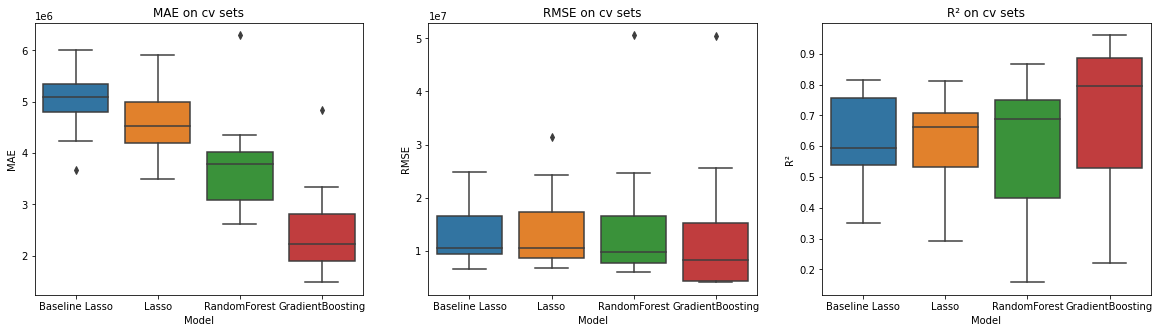

In [72]:
# Displaying boxplots :

import seaborn as sns
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# MAE :

sequence_MAE = []

for results in cv_results_MAE:
    for i in range(len(results[1])):
        sequence_MAE.append([results[0], -results[1][i]])
    
df_MAE = pd.DataFrame(sequence_MAE)
df_MAE.columns = ['Model', 'MAE']

boxplot_MAE = sns.boxplot(ax=axes[0], x="Model", y="MAE", data=df_MAE)
axes[0].set_title("MAE on cv sets")

# RMSE :

sequence_RMSE = []

for results in cv_results_RMSE:
    for i in range(len(results[1])):
        sequence_RMSE.append([results[0], -results[1][i]])
    
df_RMSE = pd.DataFrame(sequence_RMSE)
df_RMSE.columns = ['Model', 'RMSE']

boxplot_RMSE = sns.boxplot(ax=axes[1], x="Model", y="RMSE", data=df_RMSE)
axes[1].set_title("RMSE on cv sets")

# R2 :

sequence_R2 = []

for results in cv_results_R2:
    for i in range(len(results[1])):
        sequence_R2.append([results[0], results[1][i]])
    
df_R2 = pd.DataFrame(sequence_R2)
df_R2.columns = ['Model', 'R²']

boxplot_R2 = sns.boxplot(ax=axes[2], x="Model", y="R²", data=df_R2)
axes[2].set_title("R² on cv sets")


Text(0.5, 1.0, 'R² on test set')

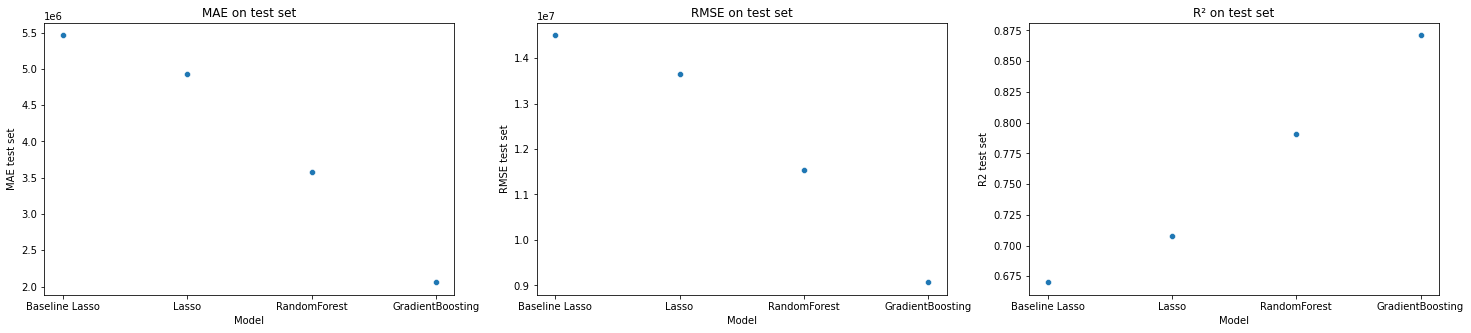

In [73]:
# Displaying performances on test set :

fig, axes = plt.subplots(1, 3, figsize=(25,5))

# MAE :

catplot_MAE = sns.scatterplot(ax=axes[0], x="Model", y="MAE test set", data=generalization)
axes[0].set_title("MAE on test set")

# RMSE :

catplot_RMSE = sns.scatterplot(ax=axes[1], x="Model", y="RMSE test set", data=generalization)
axes[1].set_title("RMSE on test set")

# R2 :

catplot_R2 = sns.scatterplot(ax=axes[2], x="Model", y="R2 test set", data=generalization)
axes[2].set_title("R² on test set")


**These results show quiete well that the GradientBoostingRegressor model performs the best on test set for every metrics.**

As the boxplots show, the MAE is the moste stable and so the most significant metric in this comparison of models.

## Our final model to predict 'SiteEnergyUse' is the GradientBoostingRegressor model with the following hyperparameters :

In [23]:
# Final Model
final_model_SiteEnergyUse = best_GradientBoosting
final_model_SiteEnergyUse

GradientBoostingRegressor(learning_rate=0.2, max_depth=6, n_estimators=200,
                          subsample=0.8)

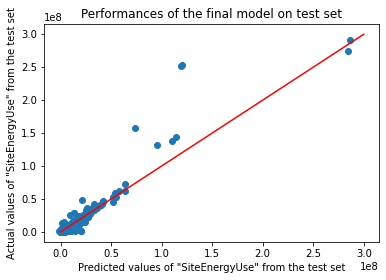

In [24]:
# Displaying some examples of prediction from the test set :

plt.plot([0, 3e8], [0, 3e8], color='red')
plt.scatter(final_model_SiteEnergyUse.predict(X1_test), y1_test)
plt.xlabel('Predicted values of "SiteEnergyUse" from the test set')
plt.ylabel('Actual values of "SiteEnergyUse" from the test set')
plt.title('Performances of the final model on test set')
plt.show()


In [25]:
# Mean % error :

print('Error ratio [MAE on test set]/[Average value of test set] :')
print(100*float(generalization["MAE test set"][generalization["Model"]=="GradientBoosting"].values[0])/y1_test.mean(),'%')

Error ratio [MAE on test set]/[Average value of test set] :
24.674127256771445 %


# Model construction for 'TotalGHGEmissions' :
## Model selection for 'TotalGHGEmissions'
### 1. Non-ensemble models

In [26]:
# Common parameters :
num_folds=10
seed = 18
score_1 = 'neg_root_mean_squared_error'
score_2 = 'neg_mean_absolute_error'
score_3 = 'r2'

# Setting of the models to test and their hyperparameters to tune :
models = []

models.append(('Lasso', Lasso()))
models.append(('Ridge', Ridge()))
models.append(('ElasticNet', ElasticNet()))
models.append(('SVM_rbf', SVR(kernel='rbf')))

# Testing the models :

raws=[]

for name, model in models:
    results_rmse = []
    results_mae = []
    results_r2 = []
    print(name)
    print('')
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results_1 = cross_val_score(model, X2_train, y2_train, cv=kfold, scoring=score_1, n_jobs=-1)
    for a in cv_results_1:
        a = np.format_float_scientific(-a, precision=3)
        results_rmse.append(a)
    cv_results_2 = cross_val_score(model, X2_train, y2_train, cv=kfold, scoring=score_2, n_jobs=-1)
    for b in cv_results_2:
        b = np.format_float_scientific(-b, precision=3)
        results_mae.append(b)
    cv_results_3 = cross_val_score(model, X2_train, y2_train, cv=kfold, scoring=score_3, n_jobs=-1)
    for c in cv_results_3:
        results_r2.append(np.round(c,3))


    # Display corresponding performances :
    print("RMSE on cross validation sets :")
    print(results_rmse)
    print("Average RMSE : ", np.format_float_scientific(-cv_results_1.mean(), precision=3))
    print("Standard deviation of RMSE : ", np.format_float_scientific(cv_results_1.std(), precision=3))
    print("[RMSE std] / [Average RMSE] : ", 100*np.round(-cv_results_1.std()/cv_results_1.mean(),3),'%')
    print('')
    print("MAE on cross validation sets :")
    print(results_mae)
    print("Average MAE : ", np.format_float_scientific(-cv_results_2.mean(), precision=3))
    print("Standard deviation of MAE : ", np.format_float_scientific(cv_results_2.std(), precision=3))
    print("[MAE std] / [Average MAE] : ", 100*np.round(-cv_results_2.std()/cv_results_2.mean(),3),'%')
    print('')
    print("R² on cross validation sets :")
    print(results_r2)
    print("Average R² : ", np.round(cv_results_3.mean(),3))
    print("Standard deviation of R² : ", np.round(cv_results_3.std(),3))
    print("[R² std] / [Average R²] : ", 100*np.round(cv_results_3.std()/cv_results_3.mean(),3),'%')
    print('')
    print('- '*30)
    
    raws.append([name, 
                np.format_float_scientific(-cv_results_1.mean(), precision=3), 
                str(str(100*np.round(-cv_results_1.std()/cv_results_1.mean(),3))+'%'),
                np.format_float_scientific(cv_results_1.std(), precision=3),
                np.format_float_scientific(-cv_results_2.mean(), precision=3),
                str(str(100*np.round(-cv_results_2.std()/cv_results_2.mean(),3))+'%'),
                np.format_float_scientific(cv_results_2.std()),
                np.round(cv_results_3.mean(),3),
                str(str(100*np.round(cv_results_3.std()/cv_results_3.mean(),3))+'%'),
                np.round(cv_results_3.std(),3)])

    
# Display corresponding performances in an array :
column_names = ['Model', 
                'Average RMSE', 
                '[RMSE std] / [RMSE average]', 
                'Standard deviation of RMSE',
                'Average MAE',
                '[MAE std] / [MAE average]',
                'Standard deviation of MAE',
                'Average R²',
                '[R² std] / [Average R²]',
                'Standard Deviation of R²']

pd.DataFrame(raws, columns=column_names)
    


Lasso

RMSE on cross validation sets :
['5.647e+02', '3.232e+02', '3.945e+02', '1.005e+03', '5.341e+02', '2.546e+02', '3.521e+02', '2.829e+02', '4.807e+02', '2.98e+02']
Average RMSE :  4.490e+02
Standard deviation of RMSE :  2.115e+02
[RMSE std] / [Average RMSE] :  47.099999999999994 %

MAE on cross validation sets :
['1.917e+02', '1.574e+02', '1.549e+02', '2.011e+02', '1.693e+02', '1.308e+02', '1.500e+02', '1.412e+02', '1.564e+02', '1.43e+02']
Average MAE :  1.596e+02
Standard deviation of MAE :  2.104e+01
[MAE std] / [Average MAE] :  13.200000000000001 %

R² on cross validation sets :
[0.754, 0.527, 0.095, 0.407, 0.575, 0.171, 0.243, -0.102, 0.607, -0.308]
Average R² :  0.297
Standard deviation of R² :  0.321
[R² std] / [Average R²] :  108.2 %

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Ridge

RMSE on cross validation sets :
['6.620e+02', '3.587e+02', '4.105e+02', '1.054e+03', '5.428e+02', '2.728e+02', '3.538e+02', '3.025e+02', '4.960e+02', '3.081e+02']
Average RMSE

,Model,Average RMSE,[RMSE std] / [RMSE average],Standard deviation of RMSE,Average MAE,[MAE std] / [MAE average],Standard deviation of MAE,Average R²,[R² std] / [Average R²],Standard Deviation of R²
0,Lasso,4.490e+02,47.099999999999994%,2.115e+02,1.596e+02,13.200000000000001%,2.103558027468965e+01,0.297,108.2%,0.321
1,Ridge,4.762e+02,47.3%,2.250e+02,1.764e+02,12.4%,2.194012211959467e+01,0.221,155.29999999999998%,0.344
2,ElasticNet,5.961e+02,60.199999999999996%,3.587e+02,1.995e+02,25.900000000000002%,5.1614440520523274e+01,0.073,53.6%,0.039
3,SVM_rbf,6.287e+02,57.3%,3.603e+02,1.628e+02,35.0%,5.699258611079536e+01,-0.068,-49.7%,0.034


On all of these models, the Lasso model has the best performances and MAE seems to be the most adequate scoring method to optimize it as it is more stable on folds than RMSE or R².

We are going to keep the Lasso model to tune further.

### 2. Ensemble models

In [30]:
# Common parameters :
num_folds=10
seed = 18
score_1 = 'neg_root_mean_squared_error'
score_2 = 'neg_mean_absolute_error'
score_3 = 'r2'

# Setting of the models to test and their hyperparameters to tune :
models = []

models.append(('DecisionTreeRegressor', DecisionTreeRegressor()))
models.append(('RandomForestRegressor', RandomForestRegressor()))
models.append(('AdaBoostRegressor', AdaBoostRegressor()))
models.append(('BaggingRegressor', BaggingRegressor()))
models.append(('GradientBoostingRegressor', GradientBoostingRegressor()))

# Testing the models :

raws=[]

for name, model in models:
    results_rmse = []
    results_mae = []
    results_r2 = []
    print(name)
    print('')
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results_1 = cross_val_score(model, X2_train, y2_train, cv=kfold, scoring=score_1, n_jobs=-1)
    for a in cv_results_1:
        a = np.format_float_scientific(-a, precision=3)
        results_rmse.append(a)
    cv_results_2 = cross_val_score(model, X2_train, y2_train, cv=kfold, scoring=score_2, n_jobs=-1)
    for b in cv_results_2:
        b = np.format_float_scientific(-b, precision=3)
        results_mae.append(b)
    cv_results_3 = cross_val_score(model, X2_train, y2_train, cv=kfold, scoring=score_3, n_jobs=-1)
    for c in cv_results_3:
        results_r2.append(np.round(c,3))


    # Display corresponding performances :
    print("RMSE on cross validation sets :")
    print(results_rmse)
    print("Average RMSE : ", np.format_float_scientific(-cv_results_1.mean(), precision=3))
    print("Standard deviation of RMSE : ", np.format_float_scientific(cv_results_1.std(), precision=3))
    print("[RMSE std] / [Average RMSE] : ", 100*np.round(-cv_results_1.std()/cv_results_1.mean(),3),'%')
    print('')
    print("MAE on cross validation sets :")
    print(results_mae)
    print("Average MAE : ", np.format_float_scientific(-cv_results_2.mean(), precision=3))
    print("Standard deviation of MAE : ", np.format_float_scientific(cv_results_2.std(), precision=3))
    print("[MAE std] / [Average MAE] : ", 100*np.round(-cv_results_2.std()/cv_results_2.mean(),3),'%')
    print('')
    print("R² on cross validation sets :")
    print(results_r2)
    print("Average R² : ", np.round(cv_results_3.mean(),3))
    print("Standard deviation of R² : ", np.round(cv_results_3.std(),3))
    print("[R² std] / [Average R²] : ", 100*np.round(cv_results_3.std()/cv_results_3.mean(),3),'%')
    print('')
    print('- '*30)
    
    raws.append([name, 
                np.format_float_scientific(-cv_results_1.mean(), precision=3), 
                str(str(100*np.round(-cv_results_1.std()/cv_results_1.mean(),3))+'%'),
                np.format_float_scientific(cv_results_1.std(), precision=3),
                np.format_float_scientific(-cv_results_2.mean(), precision=3),
                str(str(100*np.round(-cv_results_2.std()/cv_results_2.mean(),3))+'%'),
                np.format_float_scientific(cv_results_2.std()),
                np.round(cv_results_3.mean(),3),
                str(str(100*np.round(cv_results_3.std()/cv_results_3.mean(),3))+'%'),
                np.round(cv_results_3.std(),3)])

    
# Display corresponding performances in an array :
column_names = ['Model', 
                'Average RMSE', 
                '[RMSE std] / [RMSE average]', 
                'Standard deviation of RMSE',
                'Average MAE',
                '[MAE std] / [MAE average]',
                'Standard deviation of MAE',
                'Average R²',
                '[R² std] / [Average R²]',
                'Standard Deviation of R²']

pd.DataFrame(raws, columns=column_names)
    


DecisionTreeRegressor

RMSE on cross validation sets :
['8.678e+02', '7.015e+02', '1.867e+02', '1.067e+03', '2.071e+02', '2.025e+02', '2.213e+02', '2.198e+02', '2.552e+02', '1.090e+03']
Average RMSE :  5.019e+02
Standard deviation of RMSE :  3.652e+02
[RMSE std] / [Average RMSE] :  72.8 %

MAE on cross validation sets :
['1.166e+02', '1.263e+02', '7.21e+01', '1.571e+02', '5.924e+01', '6.006e+01', '6.070e+01', '7.267e+01', '5.991e+01', '1.073e+02']
Average MAE :  8.92e+01
Standard deviation of MAE :  3.324e+01
[MAE std] / [Average MAE] :  37.3 %

R² on cross validation sets :
[0.453, -0.926, 0.802, 0.287, 0.964, 0.165, 0.726, 0.071, 0.484, -2.859]
Average R² :  0.017
Standard deviation of R² :  1.081
[R² std] / [Average R²] :  6524.9 %

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
RandomForestRegressor

RMSE on cross validation sets :
['7.327e+02', '5.076e+02', '1.636e+02', '9.883e+02', '1.567e+02', '1.461e+02', '1.904e+02', '1.694e+02', '1.884e+02', '3.298e+02']
Average

,Model,Average RMSE,[RMSE std] / [RMSE average],Standard deviation of RMSE,Average MAE,[MAE std] / [MAE average],Standard deviation of MAE,Average R²,[R² std] / [Average R²],Standard Deviation of R²
0,DecisionTreeRegressor,5.019e+02,72.8%,3.652e+02,8.92e+01,37.3%,3.324135907972711e+01,0.017,6524.9%,1.081
1,RandomForestRegressor,3.573e+02,78.0%,2.787e+02,8.366e+01,40.699999999999996%,3.4011602593180925e+01,0.563,69.6%,0.392
2,AdaBoostRegressor,5.257e+02,44.0%,2.311e+02,3.952e+02,19.3%,7.615692223229193e+01,-0.690,-199.9%,1.379
3,BaggingRegressor,3.640e+02,72.8%,2.651e+02,8.787e+01,40.8%,3.589097267610121e+01,0.512,88.2%,0.451
4,GradientBoostingRegressor,3.603e+02,79.2%,2.854e+02,9.982e+01,33.2%,3.3188518346350605e+01,0.559,59.3%,0.332


For tuning, we are going to keep a parallel ensemble model; the RandomForestRegressor; and a sequential ensemble model; the GradientBoostingRegressor.

## Model tuning for predicting 'TotalGHGEmissions' :

**Lasso :**

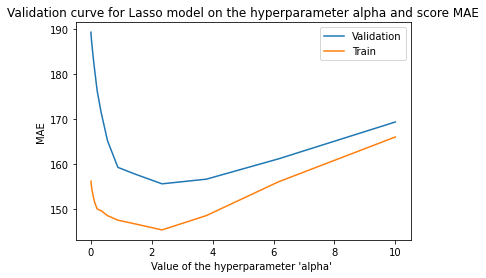

In [49]:
from sklearn.model_selection import validation_curve

model_LA = Lasso()

alphas = np.logspace(-3, 1, 20)

score = 'neg_mean_absolute_error'

alpha_train_score, alpha_val_score = validation_curve(estimator=model_LA, 
                                                      X=X2_train, 
                                                      y=y2_train,
                                                      param_name="alpha",
                                                      param_range=alphas,
                                                      cv=10,
                                                      scoring=score,
                                                      n_jobs=-1)

plt.plot(alphas, -alpha_val_score.mean(axis=1), label='Validation')
plt.plot(alphas, -alpha_train_score.mean(axis=1), label='Train')

plt.ylabel('MAE')
plt.xlabel("Value of the hyperparameter 'alpha' ")
plt.legend()
plt.title("Validation curve for Lasso model on the hyperparameter alpha and score MAE")
plt.show()

In [50]:
from sklearn import model_selection

## Common parameters :
num_folds=10
seed = 18
score = 'neg_mean_absolute_error'
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)


## Creation of model and hyperparameters based on the validation curve :
model_LA = Lasso()
hyperparameters = [{"alpha": np.logspace(-3, 1, 20)}]

tested_model = model_selection.GridSearchCV(model_LA,
                                            param_grid=hyperparameters,
                                            cv=kfold,
                                            scoring=score,
                                            n_jobs=-1)

# Fitting it on train set :
tested_model.fit(X2_train, y2_train)

# Display corresponding performances :
print("Results of cross validation :")
for mean, std, params in zip(tested_model.cv_results_['mean_test_score'], # score moyen
                             tested_model.cv_results_['std_test_score'],  # écart-type du score
                             tested_model.cv_results_['params']):           # valeur de l'hyperparamètre
                                
    print("Performances for hyperparameters values ", params, " :")
    print("Mean MAE : ", np.format_float_scientific(-mean, precision=15))
    print("Standard Deviation : ", np.format_float_scientific(std))
    print("[std of score] / [average score] : ", abs(100*np.round(std/mean, 3)), "%")
    print('')
    print('- '*30)


# Display best hyperparameters :
print('- '*30)
print("Best hyperparameters on train set for Lasso :")
print(tested_model.best_params_)
print("Performance for best hyperpârameters : ")
print(np.format_float_scientific(tested_model.best_score_))

# Saving the best model for further comparison :
best_Lasso_2 = tested_model.best_estimator_

Results of cross validation :
Performances for hyperparameters values  {'alpha': 0.001}  :
Mean MAE :  1.880419832726226e+02
Standard Deviation :  2.682060008586177e+01
[std of score] / [average score] :  14.299999999999999 %

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Performances for hyperparameters values  {'alpha': 0.001623776739188721}  :
Mean MAE :  1.879152864286686e+02
Standard Deviation :  2.6869267316847722e+01
[std of score] / [average score] :  14.299999999999999 %

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Performances for hyperparameters values  {'alpha': 0.0026366508987303583}  :
Mean MAE :  1.877189067314221e+02
Standard Deviation :  2.692541497296187e+01
[std of score] / [average score] :  14.299999999999999 %

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Performances for hyperparameters values  {'alpha': 0.004281332398719396}  :
Mean MAE :  1.874636251435793e+02
Standard Deviation :  2.6969125917948933e+01
[std of s

**RandomForest :**

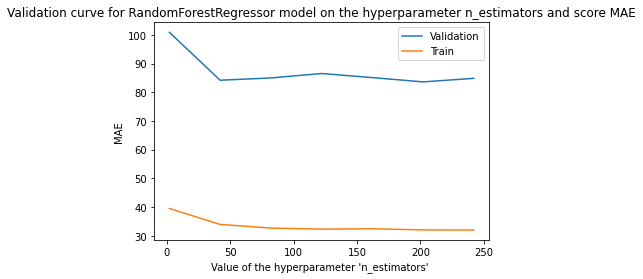

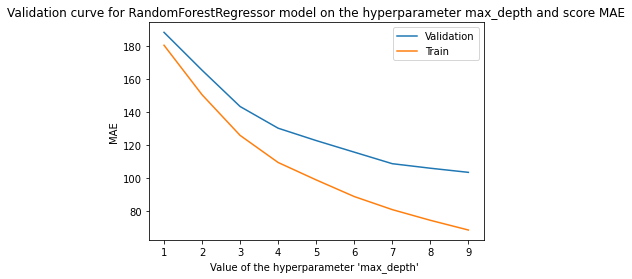

In [39]:
from sklearn.model_selection import validation_curve

model_RF = RandomForestRegressor()
score = 'neg_mean_absolute_error'

# n_estimators

n_estimators_range = np.arange(2, 250, 40)

n_estimators_train_score, n_estimators_val_score = validation_curve(estimator=model_RF, 
                                                                    X=X2_train, 
                                                                    y=y2_train,
                                                                    param_name="n_estimators",
                                                                    param_range=n_estimators_range,
                                                                    cv=5,
                                                                    scoring=score,
                                                                    n_jobs=-1)

plt.plot(n_estimators_range, -n_estimators_val_score.mean(axis=1), label='Validation')
plt.plot(n_estimators_range, -n_estimators_train_score.mean(axis=1), label='Train')

plt.ylabel('MAE')
plt.xlabel("Value of the hyperparameter 'n_estimators' ")
plt.legend()
plt.title("Validation curve for RandomForestRegressor model on the hyperparameter n_estimators and score MAE")
plt.show()

# max_depth

max_depths = np.arange(1, 10, 1)

max_depth_train_score, max_depth_val_score = validation_curve(estimator=model_RF, 
                                                              X=X2_train, 
                                                              y=y2_train,
                                                              param_name="max_depth",
                                                              param_range=max_depths,
                                                              cv=5,
                                                              scoring=score,
                                                              n_jobs=-1)

plt.plot(max_depths, -max_depth_val_score.mean(axis=1), label='Validation')
plt.plot(max_depths, -max_depth_train_score.mean(axis=1), label='Train')

plt.ylabel('MAE')
plt.xlabel("Value of the hyperparameter 'max_depth' ")
plt.legend()
plt.title("Validation curve for RandomForestRegressor model on the hyperparameter max_depth and score MAE")
plt.show()


In [40]:
## Common parameters :
num_folds=5
seed = 18
score = 'neg_mean_absolute_error'
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)


## Creation of model and hyperparameters based on the validation curve :
model_RF = RandomForestRegressor()
hyperparameters = [{"n_estimators": np.arange(40, 80, 15), "max_depth": np.arange(2, 6, 1)},
                   {"bootstrap": [False], "n_estimators": np.arange(40, 80, 15), "max_depth": np.arange(2, 6, 1)},
                   {"criterion": ['absolute_error'], "n_estimators": np.arange(40, 80, 15), "max_depth": np.arange(2, 6, 1)}]

tested_model = model_selection.GridSearchCV(model_RF,
                                            param_grid=hyperparameters,
                                            cv=kfold,
                                            scoring=score,
                                            n_jobs=-1)

# Fitting it on train set :
tested_model.fit(X2_train, y2_train)

# Display corresponding performances :
print("Results of cross validation :")
for mean, std, params in zip(tested_model.cv_results_['mean_test_score'], # score moyen
                             tested_model.cv_results_['std_test_score'],  # écart-type du score
                             tested_model.cv_results_['params']):           # valeur de l'hyperparamètre
                                
    print("Performances for hyperparameters values ", params, " :")
    print("Mean MAE : ", np.format_float_scientific(-mean, precision=15))
    print("Standard Deviation : ", np.format_float_scientific(std))
    print("[std of score] / [average score] : ", abs(100*np.round(std/mean, 3)), "%")
    print('')
    print('- '*30)


# Display best hyperparameters :
print('- '*30)
print("Best hyperparameters on train set for RandomForestRegressor :")
print(tested_model.best_params_)
print("Performance for best hyperpârameters : ")
print(np.format_float_scientific(tested_model.best_score_))

# Saving the best model for further comparison :
best_RandomForest_2 = tested_model.best_estimator_

Results of cross validation :
Performances for hyperparameters values  {'max_depth': 2, 'n_estimators': 40}  :
Mean MAE :  1.649192542509846e+02
Standard Deviation :  3.2190720742337966e+01
[std of score] / [average score] :  19.5 %

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Performances for hyperparameters values  {'max_depth': 2, 'n_estimators': 55}  :
Mean MAE :  1.664536511847165e+02
Standard Deviation :  3.101452187195627e+01
[std of score] / [average score] :  18.6 %

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Performances for hyperparameters values  {'max_depth': 2, 'n_estimators': 70}  :
Mean MAE :  1.657128788714261e+02
Standard Deviation :  2.702991156139254e+01
[std of score] / [average score] :  16.3 %

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Performances for hyperparameters values  {'max_depth': 3, 'n_estimators': 40}  :
Mean MAE :  1.442718624198082e+02
Standard Deviation :  2.536072617309151e+01
[std of score] / [

**GradientBoosting :**

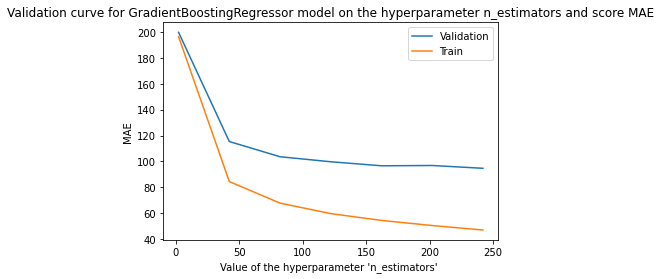

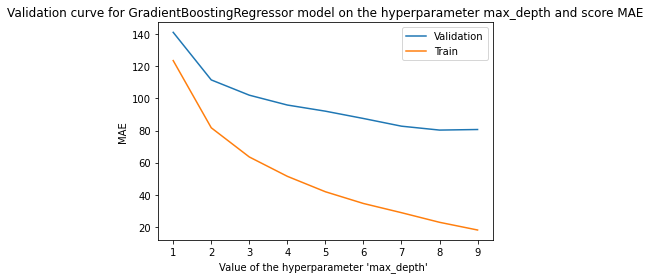

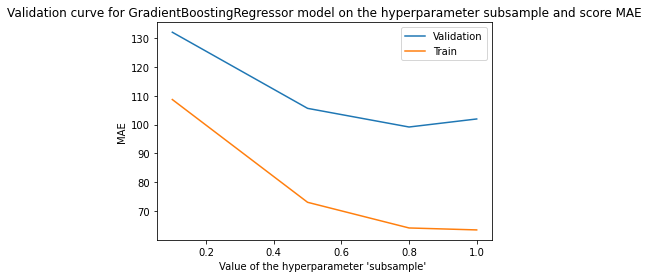

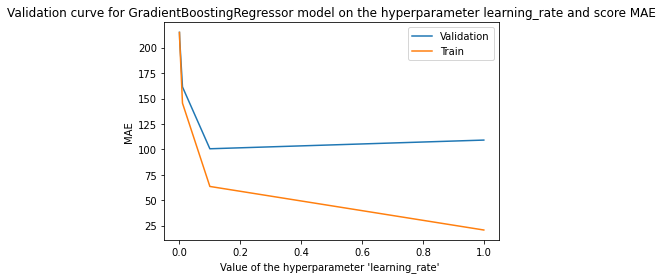

In [41]:
from sklearn.model_selection import validation_curve

model_GB = GradientBoostingRegressor()
score = 'neg_mean_absolute_error'

# n_estimators

n_estimators_range = np.arange(2, 250, 40)

n_estimators_train_score, n_estimators_val_score = validation_curve(estimator=model_GB, 
                                                                    X=X2_train, 
                                                                    y=y2_train,
                                                                    param_name="n_estimators",
                                                                    param_range=n_estimators_range,
                                                                    cv=5,
                                                                    scoring=score,
                                                                    n_jobs=-1)

plt.plot(n_estimators_range, -n_estimators_val_score.mean(axis=1), label='Validation')
plt.plot(n_estimators_range, -n_estimators_train_score.mean(axis=1), label='Train')

plt.ylabel('MAE')
plt.xlabel("Value of the hyperparameter 'n_estimators' ")
plt.legend()
plt.title("Validation curve for GradientBoostingRegressor model on the hyperparameter n_estimators and score MAE")
plt.show()

# max_depth

max_depths = np.arange(1, 10, 1)

max_depth_train_score, max_depth_val_score = validation_curve(estimator=model_GB, 
                                                              X=X2_train, 
                                                              y=y2_train,
                                                              param_name="max_depth",
                                                              param_range=max_depths,
                                                              cv=5,
                                                              scoring=score,
                                                              n_jobs=-1)

plt.plot(max_depths, -max_depth_val_score.mean(axis=1), label='Validation')
plt.plot(max_depths, -max_depth_train_score.mean(axis=1), label='Train')

plt.ylabel('MAE')
plt.xlabel("Value of the hyperparameter 'max_depth' ")
plt.legend()
plt.title("Validation curve for GradientBoostingRegressor model on the hyperparameter max_depth and score MAE")
plt.show()

# subsample

subsample_range = [0.1, 0.5, 0.8 , 1]

subsample_train_score, subsample_val_score = validation_curve(estimator=model_GB,
                                                              X=X2_train, 
                                                              y=y2_train,
                                                              param_name="subsample",
                                                              param_range=subsample_range,
                                                              cv=5,
                                                              scoring=score,
                                                              n_jobs=-1)

plt.plot(subsample_range, -subsample_val_score.mean(axis=1), label='Validation')
plt.plot(subsample_range, -subsample_train_score.mean(axis=1), label='Train')

plt.ylabel('MAE')
plt.xlabel("Value of the hyperparameter 'subsample' ")
plt.legend()
plt.title("Validation curve for GradientBoostingRegressor model on the hyperparameter subsample and score MAE")
plt.show()

# learning_rate

learning_range = np.logspace(-4, 0, 5)

learning_train_score, learning_val_score = validation_curve(estimator=model_GB, 
                                                            X=X2_train, 
                                                            y=y2_train,
                                                            param_name="learning_rate",
                                                            param_range=learning_range,
                                                            cv=5,
                                                            scoring=score,
                                                            n_jobs=-1)

plt.plot(learning_range, -learning_val_score.mean(axis=1), label='Validation')
plt.plot(learning_range, -learning_train_score.mean(axis=1), label='Train')

plt.ylabel('MAE')
plt.xlabel("Value of the hyperparameter 'learning_rate' ")
plt.legend()
plt.title("Validation curve for GradientBoostingRegressor model on the hyperparameter learning_rate and score MAE")
plt.show()

In [42]:
## Common parameters :
num_folds=5
seed = 18
score = 'neg_mean_absolute_error'
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)


## Creation of model and hyperparameters based on the validation curve :
model_GB = GradientBoostingRegressor()
hyperparameters = [{"n_estimators": [50, 80, 120, 150], 
                    "max_depth": [3, 4, 5, 6, 7], 
                    "subsample": [0.5, 0.6, 0.7, 0.8],
                    "learning_rate": [0.01, 0.05, 0.1, 0.015, 0.2]}]

tested_model = model_selection.GridSearchCV(model_GB,
                                            param_grid=hyperparameters,
                                            cv=kfold,
                                            scoring=score,
                                            n_jobs=-1)

# Fitting it on train set :
tested_model.fit(X2_train, y2_train)

# Display corresponding performances :
print("Results of cross validation :")
for mean, std, params in zip(tested_model.cv_results_['mean_test_score'], # score moyen
                             tested_model.cv_results_['std_test_score'],  # écart-type du score
                             tested_model.cv_results_['params']):           # valeur de l'hyperparamètre
                                
    print("Performances for hyperparameters values ", params, " :")
    print("Mean MAE : ", np.format_float_scientific(-mean, precision=15))
    print("Standard Deviation : ", np.format_float_scientific(std))
    print("[std of score] / [average score] : ", abs(100*np.round(std/mean, 3)), "%")
    print('')
    print('- '*30)


# Display best hyperparameters :
print('- '*30)
print("Best hyperparameters on train set for GradientBoostingRegressor :")
print(tested_model.best_params_)
print("Performance for best hyperpârameters : ")
print(np.format_float_scientific(tested_model.best_score_))

# Saving the best model for further comparison :
best_GradientBoosting_2 = tested_model.best_estimator_

Results of cross validation :
Performances for hyperparameters values  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.5}  :
Mean MAE :  1.78411500635791e+02
Standard Deviation :  2.7560110172447132e+01
[std of score] / [average score] :  15.4 %

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Performances for hyperparameters values  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.6}  :
Mean MAE :  1.783273502346514e+02
Standard Deviation :  2.8162768799274065e+01
[std of score] / [average score] :  15.8 %

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Performances for hyperparameters values  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}  :
Mean MAE :  1.790628481923561e+02
Standard Deviation :  2.7236639492771012e+01
[std of score] / [average score] :  15.2 %

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Performances for hyperparameters values  {'learning_r

Mean MAE :  1.554144000844896e+02
Standard Deviation :  2.6656783493959693e+01
[std of score] / [average score] :  17.2 %

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Performances for hyperparameters values  {'learning_rate': 0.015, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8}  :
Mean MAE :  1.565827487278122e+02
Standard Deviation :  2.76512940114501e+01
[std of score] / [average score] :  17.7 %

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Performances for hyperparameters values  {'learning_rate': 0.015, 'max_depth': 5, 'n_estimators': 80, 'subsample': 0.5}  :
Mean MAE :  1.387817792667615e+02
Standard Deviation :  2.6364073061286067e+01
[std of score] / [average score] :  19.0 %

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Performances for hyperparameters values  {'learning_rate': 0.015, 'max_depth': 5, 'n_estimators': 80, 'subsample': 0.6}  :
Mean MAE :  1.39821973746328e+02
Standard Deviation :  2.657654650603472e+01
[std

# Comparison of best models performances for 'TotalGHGEmissions' :

In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = [("Baseline Lasso", Lasso()),
          ("Lasso", best_Lasso_2), 
          ("RandomForest", best_RandomForest_2), 
          ("GradientBoosting", best_GradientBoosting_2)]


raws_generalization = []
raws_all_metrics = []

cv_results_MAE = []
cv_results_RMSE = []
cv_results_R2 = []

for name, model in models:
    # Train set :
    model.fit(X2_train, y2_train)
    y2_pred_train = model.predict(X2_train)
    MAE_train = np.format_float_scientific(mean_absolute_error(y2_train, y2_pred_train), precision=3)
    RMSE_train = np.format_float_scientific(np.sqrt(mean_squared_error(y2_train, y2_pred_train)), precision=3)
    R2_train = np.round(r2_score(y2_train, y2_pred_train),3)
    
    # CV sets :
    results_rmse = []
    results_mae = []
    results_r2 = []
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    
    cv_results_1 = cross_val_score(model, X2_train, y2_train, cv=kfold, scoring='neg_mean_absolute_error', n_jobs=-1)
    cv_results_MAE.append([name, cv_results_1])
    
    cv_results_2 = cross_val_score(model, X2_train, y2_train, cv=kfold, scoring='neg_root_mean_squared_error', n_jobs=-1)
    cv_results_RMSE.append([name, cv_results_2])
    
    cv_results_3 = cross_val_score(model, X2_train, y2_train, cv=kfold, scoring='r2', n_jobs=-1)
    cv_results_R2.append([name, cv_results_3])
        
    cv_mae_avg = np.format_float_scientific(-cv_results_1.mean(), precision=3)
    cv_mae_std = np.format_float_scientific(cv_results_1.std(), precision=3)
    cv_mae_ratio = str(str(100*np.round(-cv_results_1.std()/cv_results_1.mean(),3))+'%')
    
    cv_rmse_avg = np.format_float_scientific(-cv_results_2.mean(), precision=3)
    cv_rmse_std = np.format_float_scientific(cv_results_2.std(), precision=3)
    cv_rmse_ratio = str(str(100*np.round(-cv_results_2.std()/cv_results_2.mean(),3))+'%')
    
    cv_r2_avg = np.round(cv_results_3.mean(),3)
    cv_r2_std = np.round(cv_results_3.std(),3)
    cv_r2_ratio = str(str(100*np.round(cv_results_3.std()/cv_results_3.mean(),3))+'%')
    
    # Test set :
    model.fit(X2_train, y2_train)
    y2_pred_test = model.predict(X2_test)
    MAE_test = float(np.format_float_scientific(mean_absolute_error(y2_test, y2_pred_test), precision=3))
    RMSE_test = float(np.format_float_scientific(np.sqrt(mean_squared_error(y2_test, y2_pred_test)), precision=3))
    R2_test = float(np.round(r2_score(y2_test, y2_pred_test),3))
    
    raws_all_metrics.append([name, 
                             MAE_train, RMSE_train, R2_train, 
                             cv_mae_avg, cv_mae_std, cv_mae_ratio, 
                             cv_rmse_avg, cv_rmse_std, cv_rmse_ratio,
                             cv_r2_avg, cv_r2_std, cv_r2_ratio,
                             MAE_test, RMSE_test, R2_test])
    raws_generalization.append([name, 
                                MAE_train, cv_mae_avg, MAE_test,
                                RMSE_train, cv_rmse_avg, RMSE_test,
                                R2_train, cv_r2_avg, R2_test])
    
all_metrics_2 = pd.DataFrame(raws_all_metrics, columns=["Model", 
                                                      "MAE train set", "RMSE train set", "R2 train set", 
                                                      "MAE cv set", "std MAE cv set", "std/avg MAE cv", 
                                                      "RMSE cv set", "std RMSE cv set", "std/avg RMSE cv",
                                                      "R2 cv set", "std R2 cv set", "std/avg R2 cv",
                                                      "MAE test set", "RMSE test set", "R2 test set"])

generalization_2 = pd.DataFrame(raws_generalization, columns=["Model",
                                                            "MAE train set", "MAE cv set", "MAE test set",
                                                            "RMSE train set", "RMSE cv set", "RMSE test set",
                                                            "R2 train set", "R2 cv set", "R2 test set"])
    

In [63]:
all_metrics_2

,Model,MAE train set,RMSE train set,R2 train set,MAE cv set,std MAE cv set,std/avg MAE cv,RMSE cv set,std RMSE cv set,std/avg RMSE cv,R2 cv set,std R2 cv set,std/avg R2 cv,MAE test set,RMSE test set,R2 test set
0,Baseline Lasso,1.477e+02,4.146e+02,0.661,1.596e+02,2.104e+01,13.200000000000001%,4.490e+02,2.115e+02,47.099999999999994%,0.297,0.321,108.2%,150.90,343.9,0.582
1,Lasso,1.444e+02,4.38e+02,0.622,1.557e+02,3.106e+01,19.900000000000002%,4.732e+02,2.583e+02,54.6%,0.308,0.256,83.0%,143.00,347.1,0.574
2,RandomForest,8.552e+01,2.7e+02,0.856,1.053e+02,3.481e+01,33.1%,3.903e+02,2.759e+02,70.7%,0.497,0.357,71.8%,91.53,269.9,0.742
3,GradientBoosting,2.587e+01,3.639e+01,0.997,8.036e+01,3.249e+01,40.400000000000006%,3.484e+02,3.001e+02,86.1%,0.507,0.582,114.9%,62.39,228.8,0.815


In [64]:
generalization_2

,Model,MAE train set,MAE cv set,MAE test set,RMSE train set,RMSE cv set,RMSE test set,R2 train set,R2 cv set,R2 test set
0,Baseline Lasso,1.477e+02,1.596e+02,150.90,4.146e+02,4.490e+02,343.9,0.661,0.297,0.582
1,Lasso,1.444e+02,1.557e+02,143.00,4.38e+02,4.732e+02,347.1,0.622,0.308,0.574
2,RandomForest,8.552e+01,1.053e+02,91.53,2.7e+02,3.903e+02,269.9,0.856,0.497,0.742
3,GradientBoosting,2.587e+01,8.036e+01,62.39,3.639e+01,3.484e+02,228.8,0.997,0.507,0.815


Text(0.5, 1.0, 'R² on cv sets')

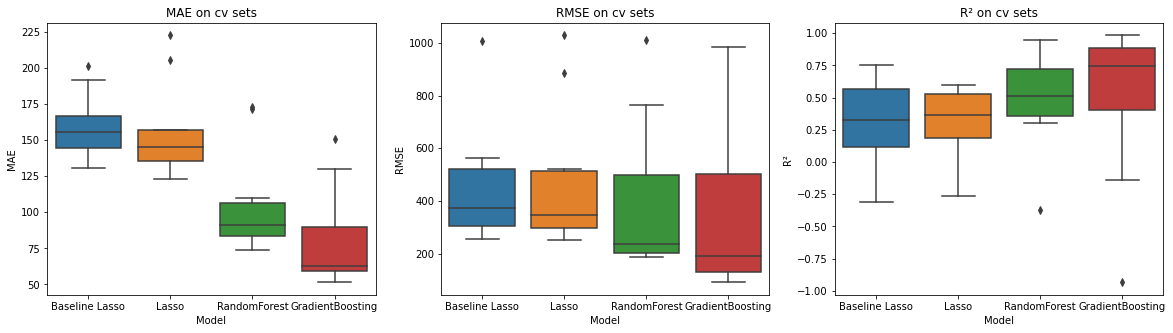

In [65]:
# Displaying boxplots :

import seaborn as sns
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# MAE :

sequence_MAE = []

for results in cv_results_MAE:
    for i in range(len(results[1])):
        sequence_MAE.append([results[0], -float(results[1][i])])
    
df_MAE = pd.DataFrame(sequence_MAE)
df_MAE.columns = ['Model', 'MAE']

boxplot_MAE = sns.boxplot(ax=axes[0], x="Model", y="MAE", data=df_MAE)
axes[0].set_title("MAE on cv sets")

# RMSE :

sequence_RMSE = []

for results in cv_results_RMSE:
    for i in range(len(results[1])):
        sequence_RMSE.append([results[0], -float(results[1][i])])
    
df_RMSE = pd.DataFrame(sequence_RMSE)
df_RMSE.columns = ['Model', 'RMSE']

boxplot_RMSE = sns.boxplot(ax=axes[1], x="Model", y="RMSE", data=df_RMSE)
axes[1].set_title("RMSE on cv sets")

# R2 :

sequence_R2 = []

for results in cv_results_R2:
    for i in range(len(results[1])):
        sequence_R2.append([results[0], float(results[1][i])])
    
df_R2 = pd.DataFrame(sequence_R2)
df_R2.columns = ['Model', 'R²']

boxplot_R2 = sns.boxplot(ax=axes[2], x="Model", y="R²", data=df_R2)
axes[2].set_title("R² on cv sets")


Text(0.5, 1.0, 'R² on test set')

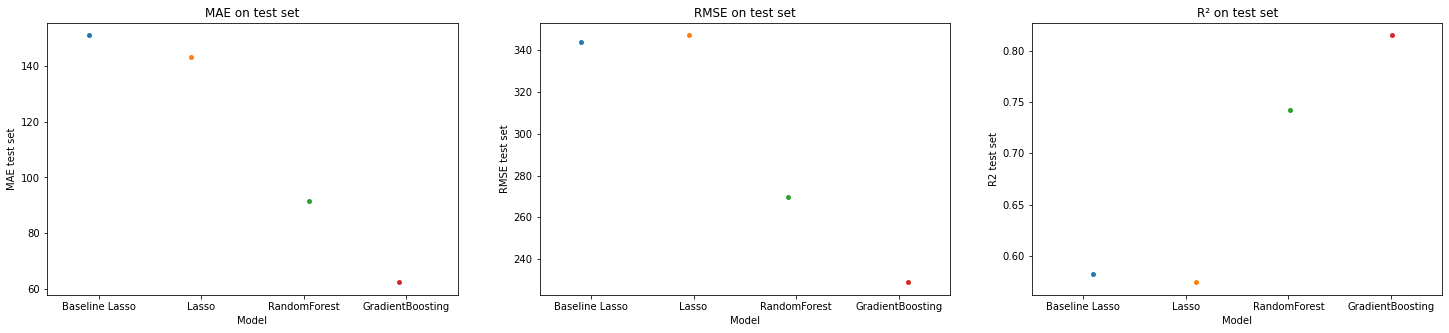

In [66]:
# Displaying performances on test set :

fig, axes = plt.subplots(1, 3, figsize=(25,5))

# MAE :

catplot_MAE = sns.stripplot(ax=axes[0], x="Model", y="MAE test set", data=generalization_2)
axes[0].set_title("MAE on test set")

# RMSE :

catplot_RMSE = sns.stripplot(ax=axes[1], x="Model", y="RMSE test set", data=generalization_2)
axes[1].set_title("RMSE on test set")

# R2 :

catplot_R2 = sns.stripplot(ax=axes[2], x="Model", y="R2 test set", data=generalization_2)
axes[2].set_title("R² on test set")


These results show that the GradientBoostingRegressor model performs better regarding every metric here.

# Our final model to predict 'TotalGHGEmissions' is the GradientBoostingRegressor model with the following hyperparameters :

In [68]:
# Final Model
final_model_Emissions = best_GradientBoosting_2
final_model_Emissions

GradientBoostingRegressor(max_depth=7, n_estimators=150, subsample=0.8)

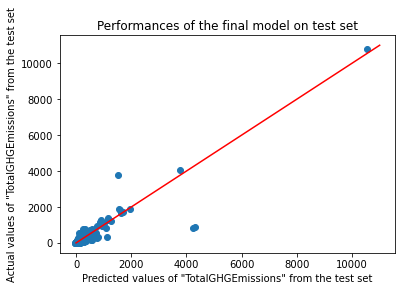

In [80]:
# Displaying some examples of prediction from the test set :

plt.plot([0, 1.1e4], [0, 1.1e4], color='red')
plt.scatter(final_model_Emissions.predict(X2_test), y2_test)
plt.xlabel('Predicted values of "TotalGHGEmissions" from the test set')
plt.ylabel('Actual values of "TotalGHGEmissions" from the test set')
plt.title('Performances of the final model on test set')
plt.show()


In [75]:
# Mean % error :

print('Error ratio [MAE on test set]/[Average value of test set] :')
print(100*float(generalization_2["MAE test set"][generalization_2["Model"]=="GradientBoosting"].values[0])/y2_test.mean(),'%')

Error ratio [MAE on test set]/[Average value of test set] :
38.15561659428031 %
